<a href="https://colab.research.google.com/github/ashwinkumaar/DSA5105-homework-1/blob/main/DSA5105_homework1_Ashwin_A0162603N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSA 5105 - Homework 1: Coding Assigment

## Description

As the first coding assignment of this course, you will apply the knowledge you have learned in the first lecture on `linear models` and simple extensions using `kernel` methods on some datasets. This is also a chance to learn to use `jupyter notebook` and basic `sklearn` functionalities. A basic introduction to installing and using `jupyter notebooks` is found [here](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook). You are strongly encouraged to use python 3 instead of python 2


The goals of this homework are
  * Learn basic data processing and machine learning using python
  * Reinforce knowledge on linear models and kernel methods
  * Prepare for the project in this course
  
You should also learn to look at documentation of online libraries. For example, if you want to perform *kernel ridge regression* using `sklearn`, a quick google will land you on [this page](https://scikit-learn.org/stable/modules/kernel_ridge.html), where extensive description and examples are given.

## Instructions

Please complete each question below directly in this notebook. Note that you can write in the cells to describe what you are doing and any issues you face. If you are familiar, you can also format it using `markdown` as it is supported by `jupyter`.

The grade given is based on the following
  1. Scientific correctness of your approach
  2. Clear documentation of your approach

## Dataset

We will work on a standard regression dataset on predicting concrete compressive strength from various composition and processing properties.

We will download the dataset directly from the [UCI repository](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength) using `urllib`. Running it requires an internet connection. Otherwise, you can also download the `Concrete_Data.xls` directly from the link above and place into the root folder relative to this notebook.

Reading the Excel file requires the `xlrd` library on top of `pandas`. If you see an error due to not having xlrd, install it via
```
$pip install xlrd
```

In general, if you see an error
```
ModuleNotFoundError: No module named 'some_module'
```
just install it
```
$pip install some_module
```

In [81]:
import pandas as pd
import urllib.request

In [82]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls'
urllib.request.urlretrieve(url, './Concrete_Data.xls')
data_raw = pd.read_excel('./Concrete_Data.xls')

In [83]:
data_raw.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

## Question 1 (5 points)

In this homework we are going to predict the last column values (Concrete compressive strength) from design variables in the other columns. Choose 3 input properties and visualize each of their effects on the compressive strength. Plot your findings below. You may find the `seaborn` library examples in lecture 1 useful.

## Question 2 (5 points)

Perform linear regression using all the input variables on this dataset to predict the compressive strength. Carefully evaluate your regression model using appropriate metrics and datasets.

## Question 3 (5 points)

Now, instead of linear regression, apply kernel ridge regression (documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html)) with 3 kernels:
1. linear kernel
2. polynomial kernel with degree 3
3. rbf kernel

Quantify the performance improvement (if any) with respect to the linear case, and also the other kernels. What do you observe? Which would you choose?

*Hint: For the RBF kernel, should you do something to the inputs first? Why?*

---

Note: we have not gone through cross validation and hyper-parameter tuning yet, so you are not expected to do this here -- although you are free to do it if you know how.

# Answer 1

#### 1.1 Data Initialization

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

In [85]:
# checking the column names in the raw data
data_raw.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [86]:
# extracting the full-text column names of the dataset
data_column_names = data_raw.keys()

# renaming the columns to give them shorter keys
data = data_raw.rename(columns={'Cement (component 1)(kg in a m^3 mixture)': 'cement',
                     'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'blast_furnace_slag',
                     'Fly Ash (component 3)(kg in a m^3 mixture)': 'fly_ash',
                     'Water  (component 4)(kg in a m^3 mixture)': 'water',
                     'Superplasticizer (component 5)(kg in a m^3 mixture)': 'superplasticizer',
                     'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'coarse_aggregate',
                     'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'fine_aggregate',
                     'Age (day)': 'age',
                     'Concrete compressive strength(MPa, megapascals) ': 'concrete_compressive_strength'
                     })

data

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      coarse_aggregate  fine_aggregate  age  concrete_compressive_strength  
0               1040.0           676.0   28                      79.986111  
1               1055.0           676.0   28                      61.887366  
2                932.0           594.0  270                      40.269535  
3                932.0           594.0  365                      41.052780  
4                978.4           825.5  360                      44.296075  
...                ...             ...  ...                            ...  
1025             870.1           768.3   28                      44.284354  
1026             817.9           813.4   28                      31.178794  
1027             892.4           780.0   28                      23.696601  
1028             989.6           788.9   28                      32.768036  
1029             864.5           761.5   28                      32.401235  

[1030 rows x 9 columns]

In [87]:
# info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


The dataset info gives us the total number of rows (1030), number of columns (9), and data types of the columns, ie. all columns age are float type while age is integer type.

In [88]:
# data types of the columns
data.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

In [89]:
# shape of the dataset
data.shape

(1030, 9)

#### 1.2 Exploratory Data Analysis

###### 1.2.1 Dataset Statistics Summary

In [90]:
data.describe().T

count        mean         std         min  \
cement                         1030.0  281.165631  104.507142  102.000000   
blast_furnace_slag             1030.0   73.895485   86.279104    0.000000   
fly_ash                        1030.0   54.187136   63.996469    0.000000   
water                          1030.0  181.566359   21.355567  121.750000   
superplasticizer               1030.0    6.203112    5.973492    0.000000   
coarse_aggregate               1030.0  972.918592   77.753818  801.000000   
fine_aggregate                 1030.0  773.578883   80.175427  594.000000   
age                            1030.0   45.662136   63.169912    1.000000   
concrete_compressive_strength  1030.0   35.817836   16.705679    2.331808   

                                      25%         50%          75%  \
cement                         192.375000  272.900000   350.000000   
blast_furnace_slag               0.000000   22.000000   142.950000   
fly_ash                          0.000000    0.000000   118.270000   
water                          164.900000  185.000000   192.000000   
superplasticizer                 0.000000    6.350000    10.160000   
coarse_aggregate               932.000000  968.000000  1029.400000   
fine_aggregate                 730.950000  779.510000   824.000000   
age                              7.000000   28.000000    56.000000   
concrete_compressive_strength   23.707115   34.442774    46.136287   

                                       max  
cement                          540.000000  
blast_furnace_slag              359.400000  
fly_ash                         200.100000  
water                           247.000000  
superplasticizer                 32.200000  
coarse_aggregate               1145.000000  
fine_aggregate                  992.600000  
age                             365.000000  
concrete_compressive_strength    82.599225

The table above gives descriptive statistics of the dataset (mean, median, mode, percentiles, min, max, and standard deviation) and count of the columns of the dataset.



###### 1.2.2 Verifying Null Values

<Axes: >

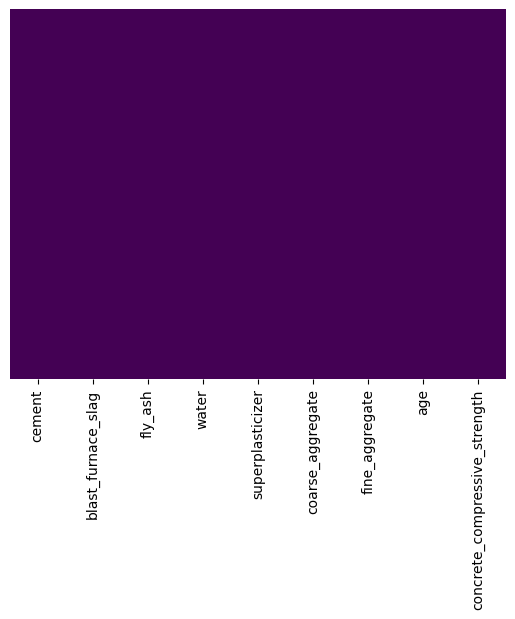

In [91]:
# vrifying null values
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [92]:
data.isna().any()

cement                           False
blast_furnace_slag               False
fly_ash                          False
water                            False
superplasticizer                 False
coarse_aggregate                 False
fine_aggregate                   False
age                              False
concrete_compressive_strength    False
dtype: bool

In [93]:
data.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

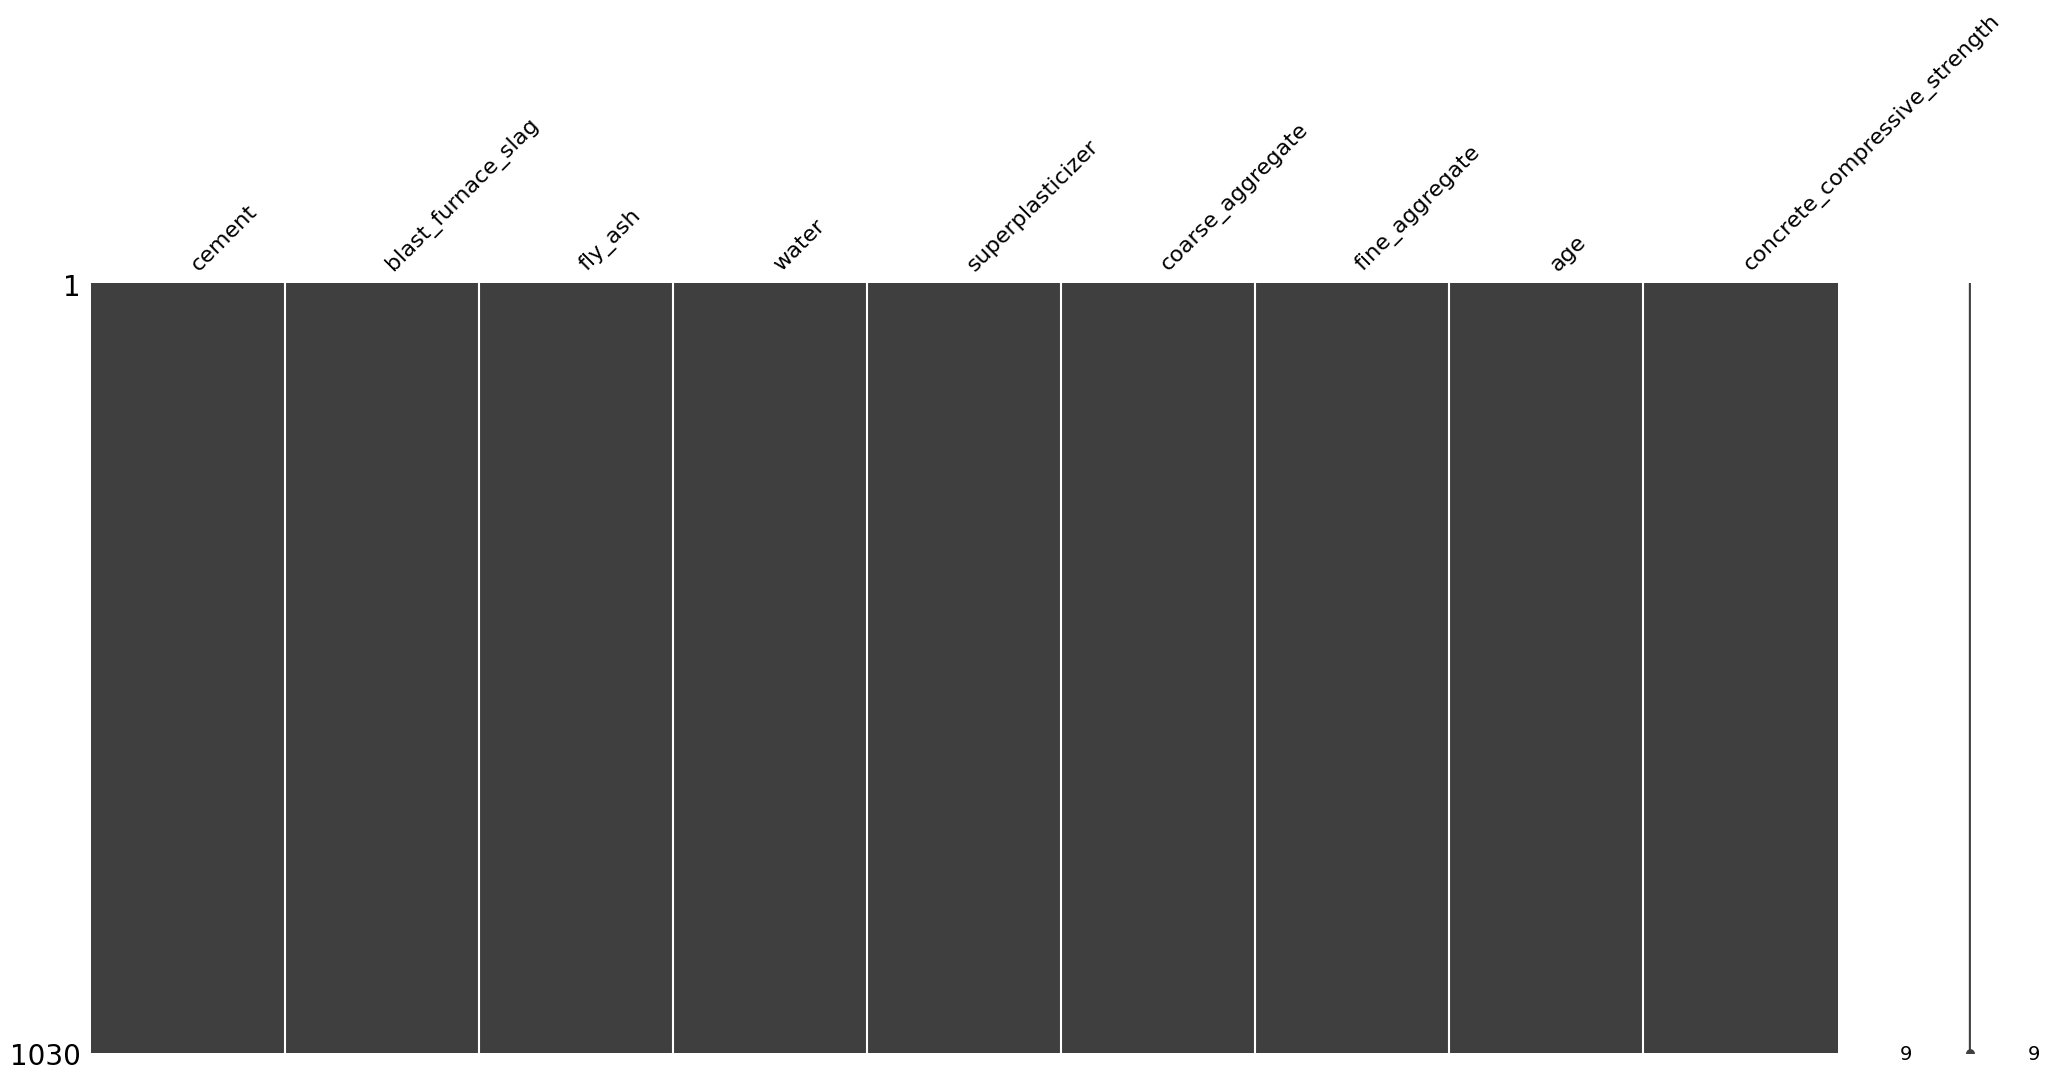

In [94]:
#checking if the dataset has any null values in it
ms.matrix(data)
plt.show()

###### 1.2.3 Multivariate Analysis

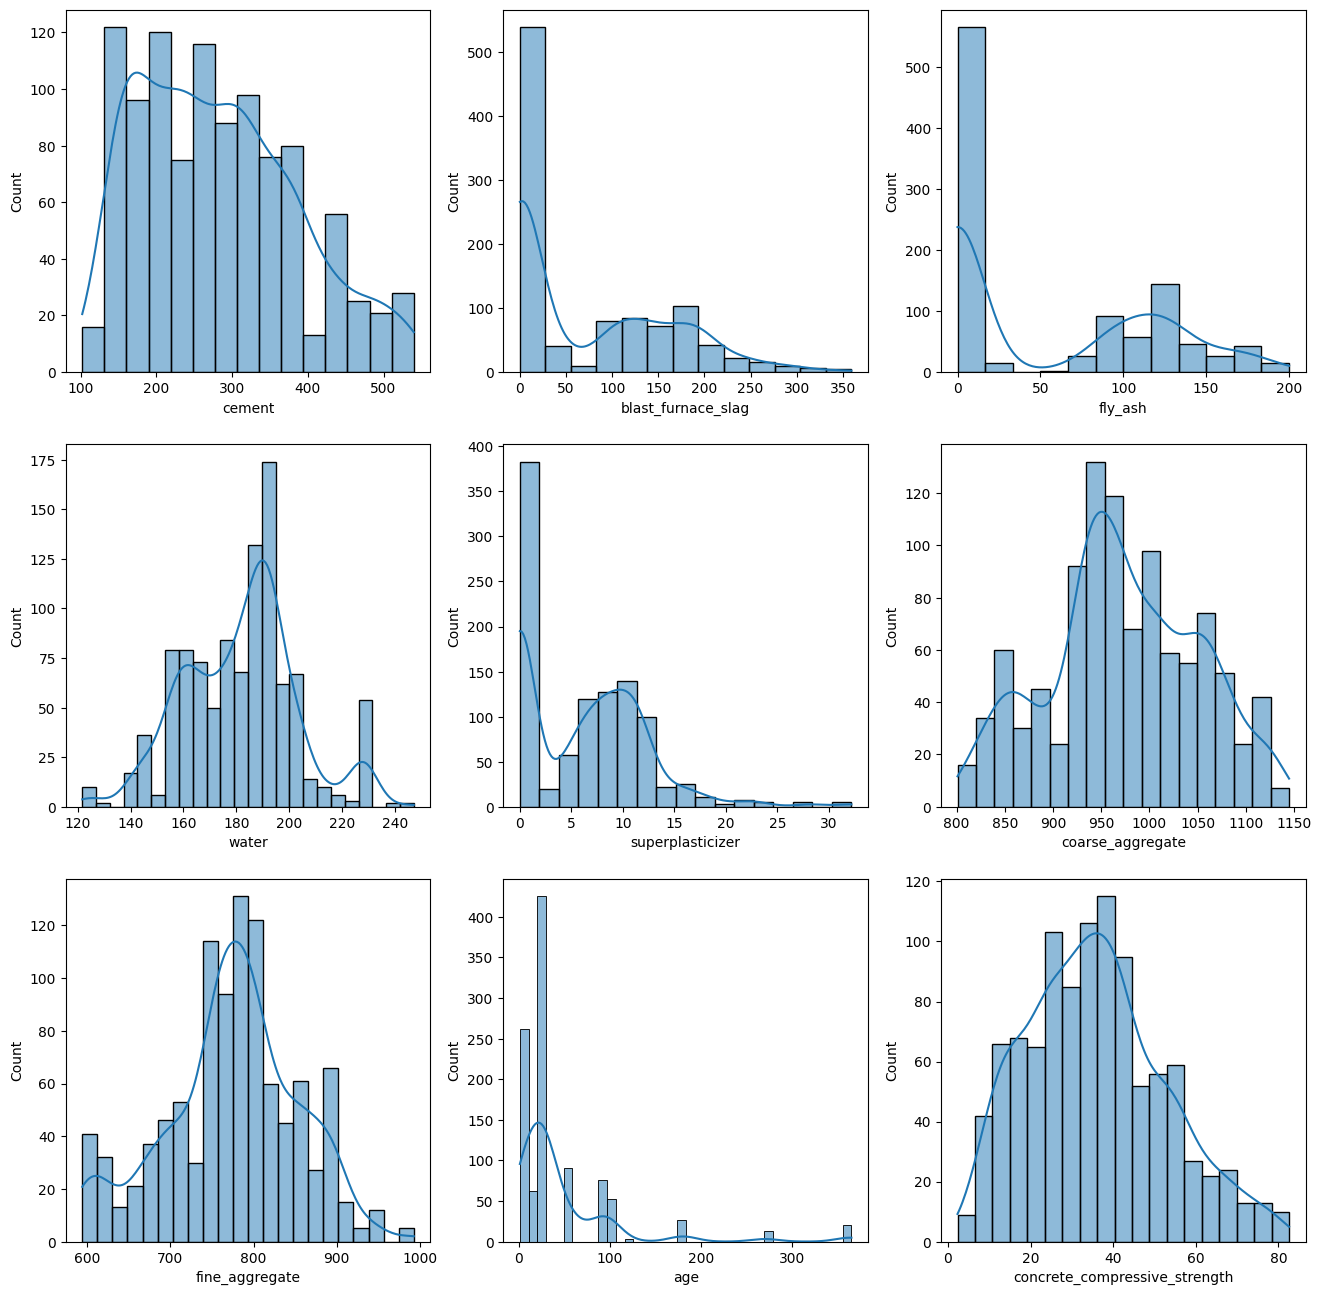

In [95]:
# displot
fig, ax1 = plt.subplots(3, 3, figsize=(16,16))

data_cols = data.columns.tolist()

for i in range(3):
  for j in range(3):
    sns.histplot(data[data_cols.pop(0)], ax=ax1[i][j], kde=True)

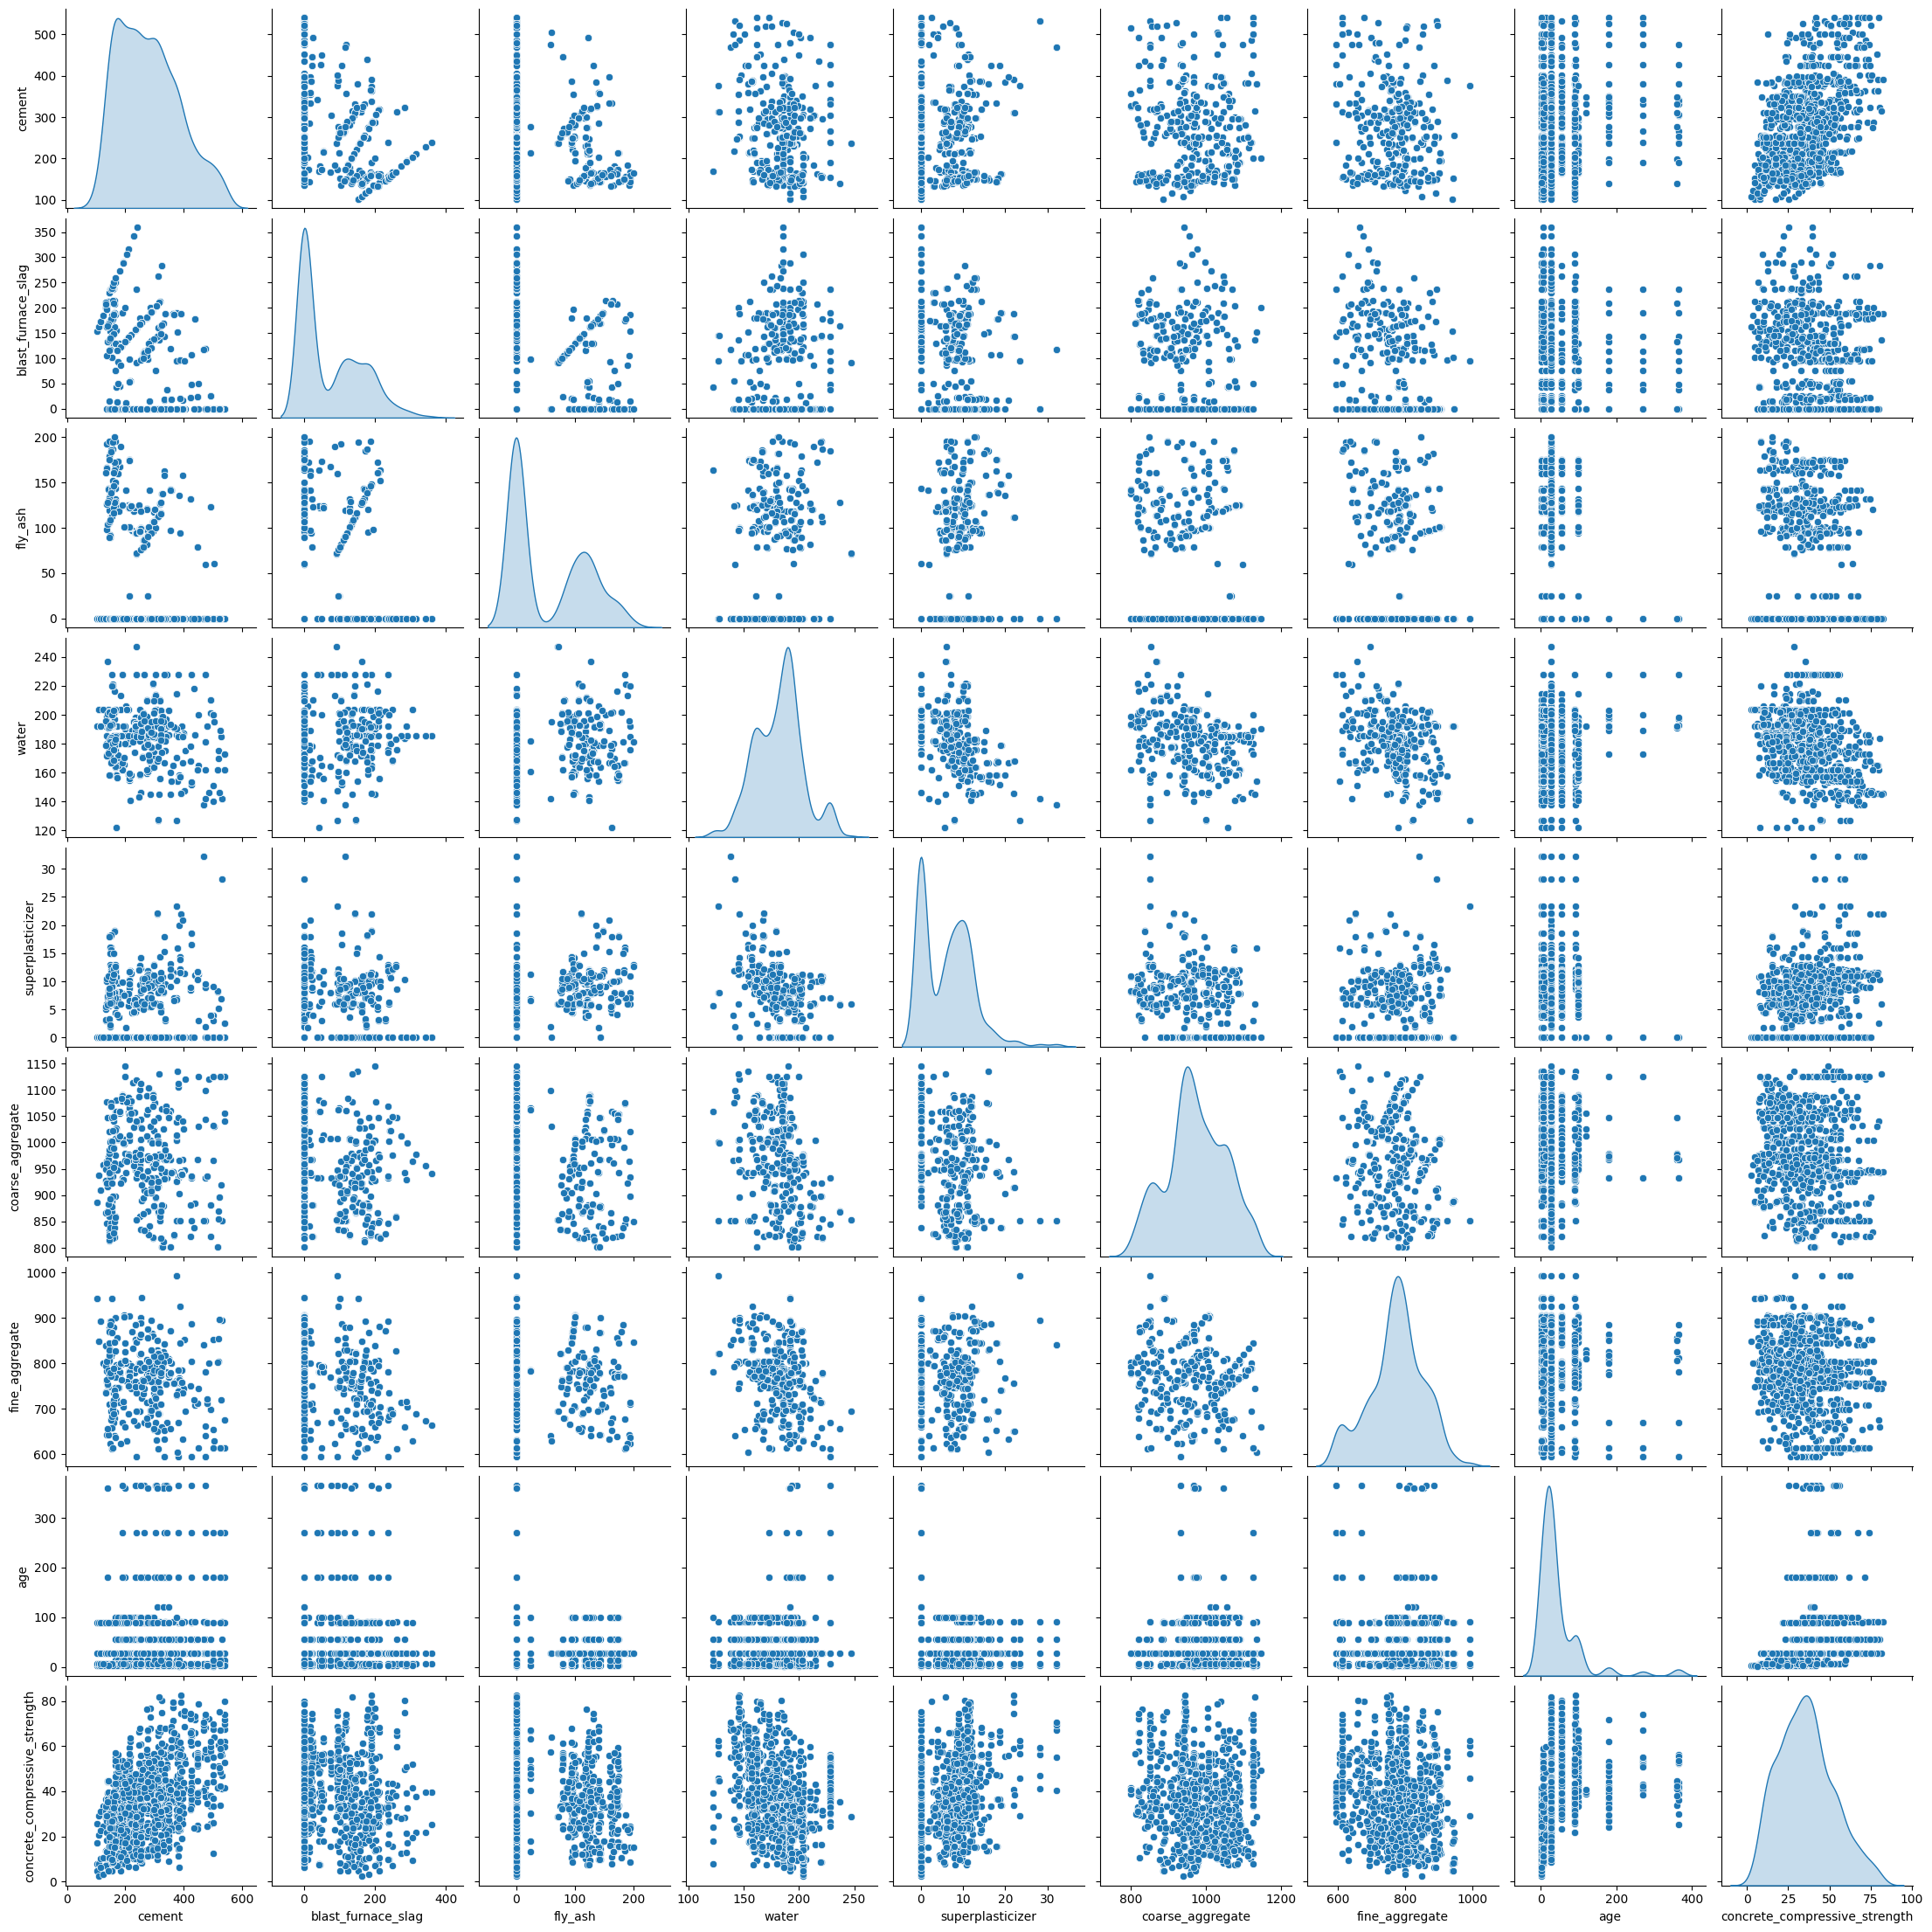

In [96]:
sns.pairplot(data=data, diag_kind='kde')

In [97]:
data.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age',
       'concrete_compressive_strength'],
      dtype='object')

From the above histogram plots, we can see the distribution of each of the input variables and target variable. In the scatterplot, we can also see the relationship between pairs of variables in the multivariate dataset.



**Diagonals Analysis**

The diagonal gives the same information as the histplot above. Here are a few observations.


*   `cement` variable has an almost normal distribution
*   `blast_furnace_slag` has two gausssians and is positively skewed. It shows the presence of outliers
*   `fly_ash` has two gaussians and is positively skewed. It shows the presence of outliers
*   `water` has three guassians and slighly negatively skewed. It shows the presence of outliers
*   `superplasticizer` has multiple gaussians and is positively skewed. It shows the presence of outliers
*   `coarse_aggregate` has three guassians and is almost normally distributed


*   `fine_aggregate` has almost two guassians and is almost normally distributed
*   `age` has multiple guassians and is positively skewed. It shows the presence of outliers
*   `concrete_compressive_strength` is close to a normal curve.


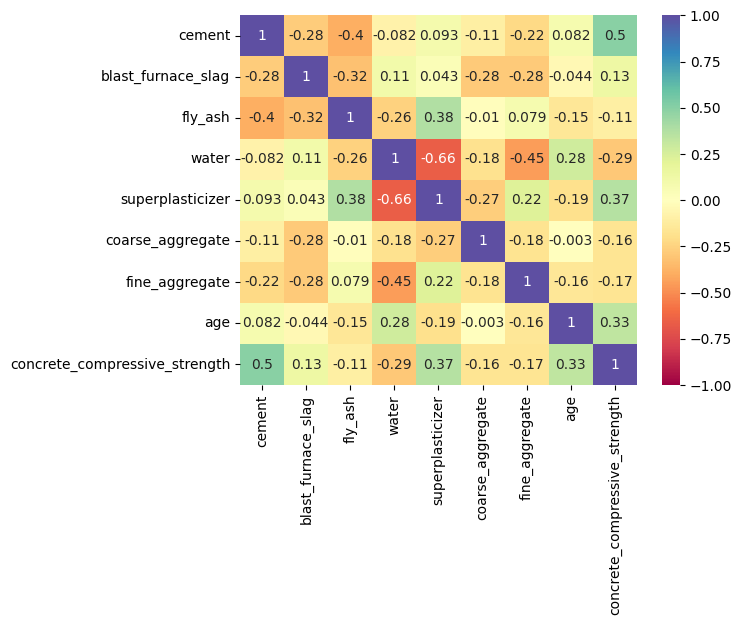

In [98]:
corr = data.corr()
sns.heatmap(corr, cmap='Spectral', annot=True, vmax=1, vmin=-1)
plt.show()



In the correlation heatmap plot, we can see that the input variables most correlated with the target variable are `cement`, `superplasticizer`, and `age`, in order of decreasing magnitude of correlation, with correlation coefficients of 0.50, 0.37 and 0.33, respectively. That is, these input variables with the largest absolute value of correlation with `concrete_compressive_strength`. Hence, we will further visualise the effects of these 3 variables on compressive strength.

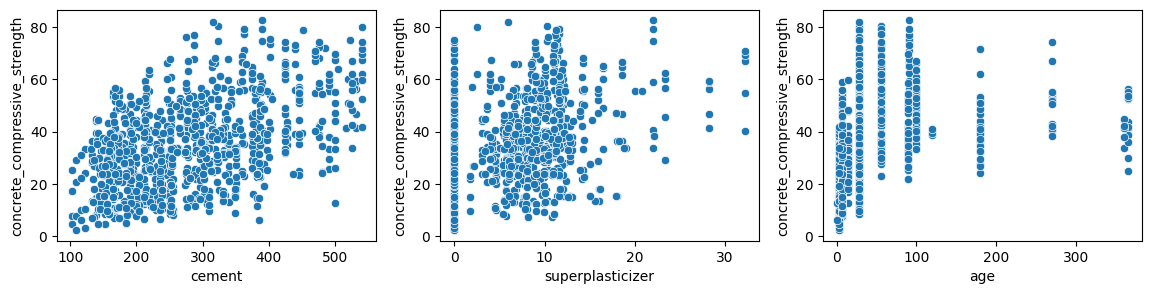

In [99]:
fig, ax = plt.subplots(1, 3, figsize=(14,3))

sns.scatterplot(x=data['cement'], y=data['concrete_compressive_strength'], ax=ax[0])
sns.scatterplot(x=data['superplasticizer'], y=data['concrete_compressive_strength'], ax=ax[1])
sns.scatterplot(x=data['age'], y=data['concrete_compressive_strength'], ax=ax[2])
plt.show()

# Answer 2

#### 2.1 Data Initialization

Let us begin by splitting the data into X and y datasets to represent the input and target variables.

We then split the X and y datsets into training and testing data. The reason for this is so that we can gauge the performance of our trained model based on unseen data.

In [100]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["concrete_compressive_strength"])
y = data.concrete_compressive_strength

X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25,shuffle=True)

X_train_unscaled.shape, X_test_unscaled.shape, y_train.shape, y_test.shape

((772, 8), (258, 8), (772,), (258,))

In [101]:
X_train_unscaled

cement  blast_furnace_slag  fly_ash   water  superplasticizer  \
441  250.00                 0.0    95.69  191.84              5.33   
420  165.00               128.5   132.10  175.06              8.08   
819  525.00                 0.0     0.00  189.00              0.00   
642  250.00                 0.0     0.00  182.00              0.00   
538  480.00                 0.0     0.00  192.00              0.00   
..      ...                 ...      ...     ...               ...   
255  212.52                 0.0   100.37  159.32              8.71   
886  148.00                 0.0   137.00  158.00             16.00   
143  375.00                93.8     0.00  126.60             23.40   
474  446.00                24.0    79.00  162.00             10.30   
318  251.81                 0.0    99.94  146.14             12.35   

     coarse_aggregate  fine_aggregate  age  
441             948.9          857.20   28  
420            1005.8          746.60   14  
819            1125.0          613.00   90  
642            1100.0          820.00   28  
538             936.2          712.20    7  
..                ...             ...  ...  
255            1007.8          903.59   14  
886            1002.0          830.00   28  
143             852.1          992.60   56  
474             967.0          712.00   28  
318            1006.0          899.76  100  

[772 rows x 8 columns]

In [102]:
data_range = pd.DataFrame()

data_range['min'] = data.min()
data_range['max'] = data.max()
data_range['range'] = data.max() - data.min()
data_range.sort_values(by='range')

min          max       range
superplasticizer                 0.000000    32.200000   32.200000
concrete_compressive_strength    2.331808    82.599225   80.267417
water                          121.750000   247.000000  125.250000
fly_ash                          0.000000   200.100000  200.100000
coarse_aggregate               801.000000  1145.000000  344.000000
blast_furnace_slag               0.000000   359.400000  359.400000
age                              1.000000   365.000000  364.000000
fine_aggregate                 594.000000   992.600000  398.600000
cement                         102.000000   540.000000  438.000000

Since the dataset has abrupt values, we also standardize the input dataset so that the gradient descent converges quicker towards the minima.

Differences in the scales among input variables can pose challenges when modeling a problem. In the datsaet here, we can see that the input values have a wide range. The variable with the smallest range is `superplasticizer`, with a range of 32.2, and that with the largest range is `cement`, with a range of 438.

Since the ranges of the variables spans from tens to hundreds of units, it can lead to a model that learns disproportionately large weight values. Models with such large weight values often exhibit instability, which translates to suboptimal performance during the learning process and heightened sensitivity to input values, ultimately leading to increased generalization errors.

Algorithms that fit a model using a weighted sum of input variables are affected, such as linear regression. Also, algorithms that use distance measures between examples or exemplars are affected, including support vector machines.

A solution to this would be adjusting the scale of the data. Common techniques include normalization, standardization, and min-max transformation. In this exercise, we will use standardization.

Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

To prevent any inadvertent leakage of information regarding the test set's distribution into the model, it is advisable to opt for an approach where the dataset is first split into training and test datasets, and the scaling operation subsequently applied. In this approach, we should fit the scaler exclusively on your training data and subsequently standardize both the training and test sets using that scaler.

Conversely, an approach where the scaler is fit on the entire dataset before splitting, there is a risk that information from the test set influences the transformation of the training set. This could, in turn, impact downstream processes.

For instance, having knowledge of the entire dataset's distribution might affect your approach to identifying and handling outliers, as well as the parameterization of your model. While the raw data itself remains undisclosed, information regarding the data's distribution may be inadvertently incorporated while training the model. Consequently, the model's performance on the test set may not accurately reflect its performance on truly unseen data.

In [103]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = pd.DataFrame(sc.fit_transform(X_train_unscaled), index=X_train_unscaled.index, columns=X_train_unscaled.columns)
X_test = pd.DataFrame(sc.transform(X_test_unscaled), index=X_test_unscaled.index, columns=X_test_unscaled.columns)

X_train_range = pd.DataFrame()

X_train_range['min'] = X_train.min()
X_train_range['max'] = X_train.max()
X_train_range['range'] = X_train.max() - X_train.min()
X_train_range['mean'] = X_train.mean()
X_train_range['st_dev'] = X_train.std()
X_train_range

min       max     range          mean    st_dev
cement             -1.725266  2.434268  4.159534  3.359431e-16  1.000648
blast_furnace_slag -0.844056  3.320577  4.164633  4.486912e-17  1.000648
fly_ash            -0.845311  2.269068  3.114379 -4.601961e-18  1.000648
water              -2.794091  2.591179  5.385270 -1.267840e-15  1.000648
superplasticizer   -1.016004  4.260772  5.276777  7.363137e-17  1.000648
coarse_aggregate   -2.180690  2.048659  4.229349 -3.681569e-16  1.000648
fine_aggregate     -2.250327  2.772627  5.022953 -1.794765e-15  1.000648
age                -0.703057  5.031431  5.734488  2.070882e-17  1.000648

In [104]:
data_train = pd.concat([X_train, y_train], axis=1, join='inner')
data_train.columns = data.columns
data_train

cement  blast_furnace_slag   fly_ash     water  superplasticizer  \
441 -0.319762           -0.844056  0.644019  0.480994         -0.142550   
420 -1.126977            0.644968  1.210708 -0.303082          0.308106   
819  2.291818           -0.844056 -0.845311  0.348290         -1.016004   
642 -0.319762           -0.844056 -0.845311  0.021202         -1.016004   
538  1.864468           -0.844056 -0.845311  0.488471         -1.016004   
..        ...                 ...       ...       ...               ...   
255 -0.675696           -0.844056  0.716859 -1.038563          0.411347   
886 -1.288420           -0.844056  1.286973 -1.100242          1.605996   
143  0.867320            0.242874 -0.845311 -2.567466          2.818672   
474  1.541582           -0.565950  0.384254 -0.913335          0.671909   
318 -0.302573           -0.844056  0.710167 -1.654423          1.007853   

     coarse_aggregate  fine_aggregate       age  concrete_compressive_strength  
441         -0.303941        1.066385 -0.277696                      27.220512  
420          0.418082       -0.327339 -0.498254                      33.087953  
819          1.930648       -2.010898  0.699057                      58.784724  
642          1.613415        0.597610 -0.277696                      20.870439  
538         -0.465095       -0.760831 -0.608532                      34.569637  
..                ...             ...       ...                            ...  
255          0.443460        1.650968 -0.498254                      26.310404  
886          0.369862        0.723625 -0.277696                      17.953955  
143         -1.532266        2.772627  0.163418                      60.198150  
474         -0.074264       -0.763351 -0.277696                      53.386127  
318          0.420619        1.602704  0.856598                      45.367521  

[772 rows x 9 columns]

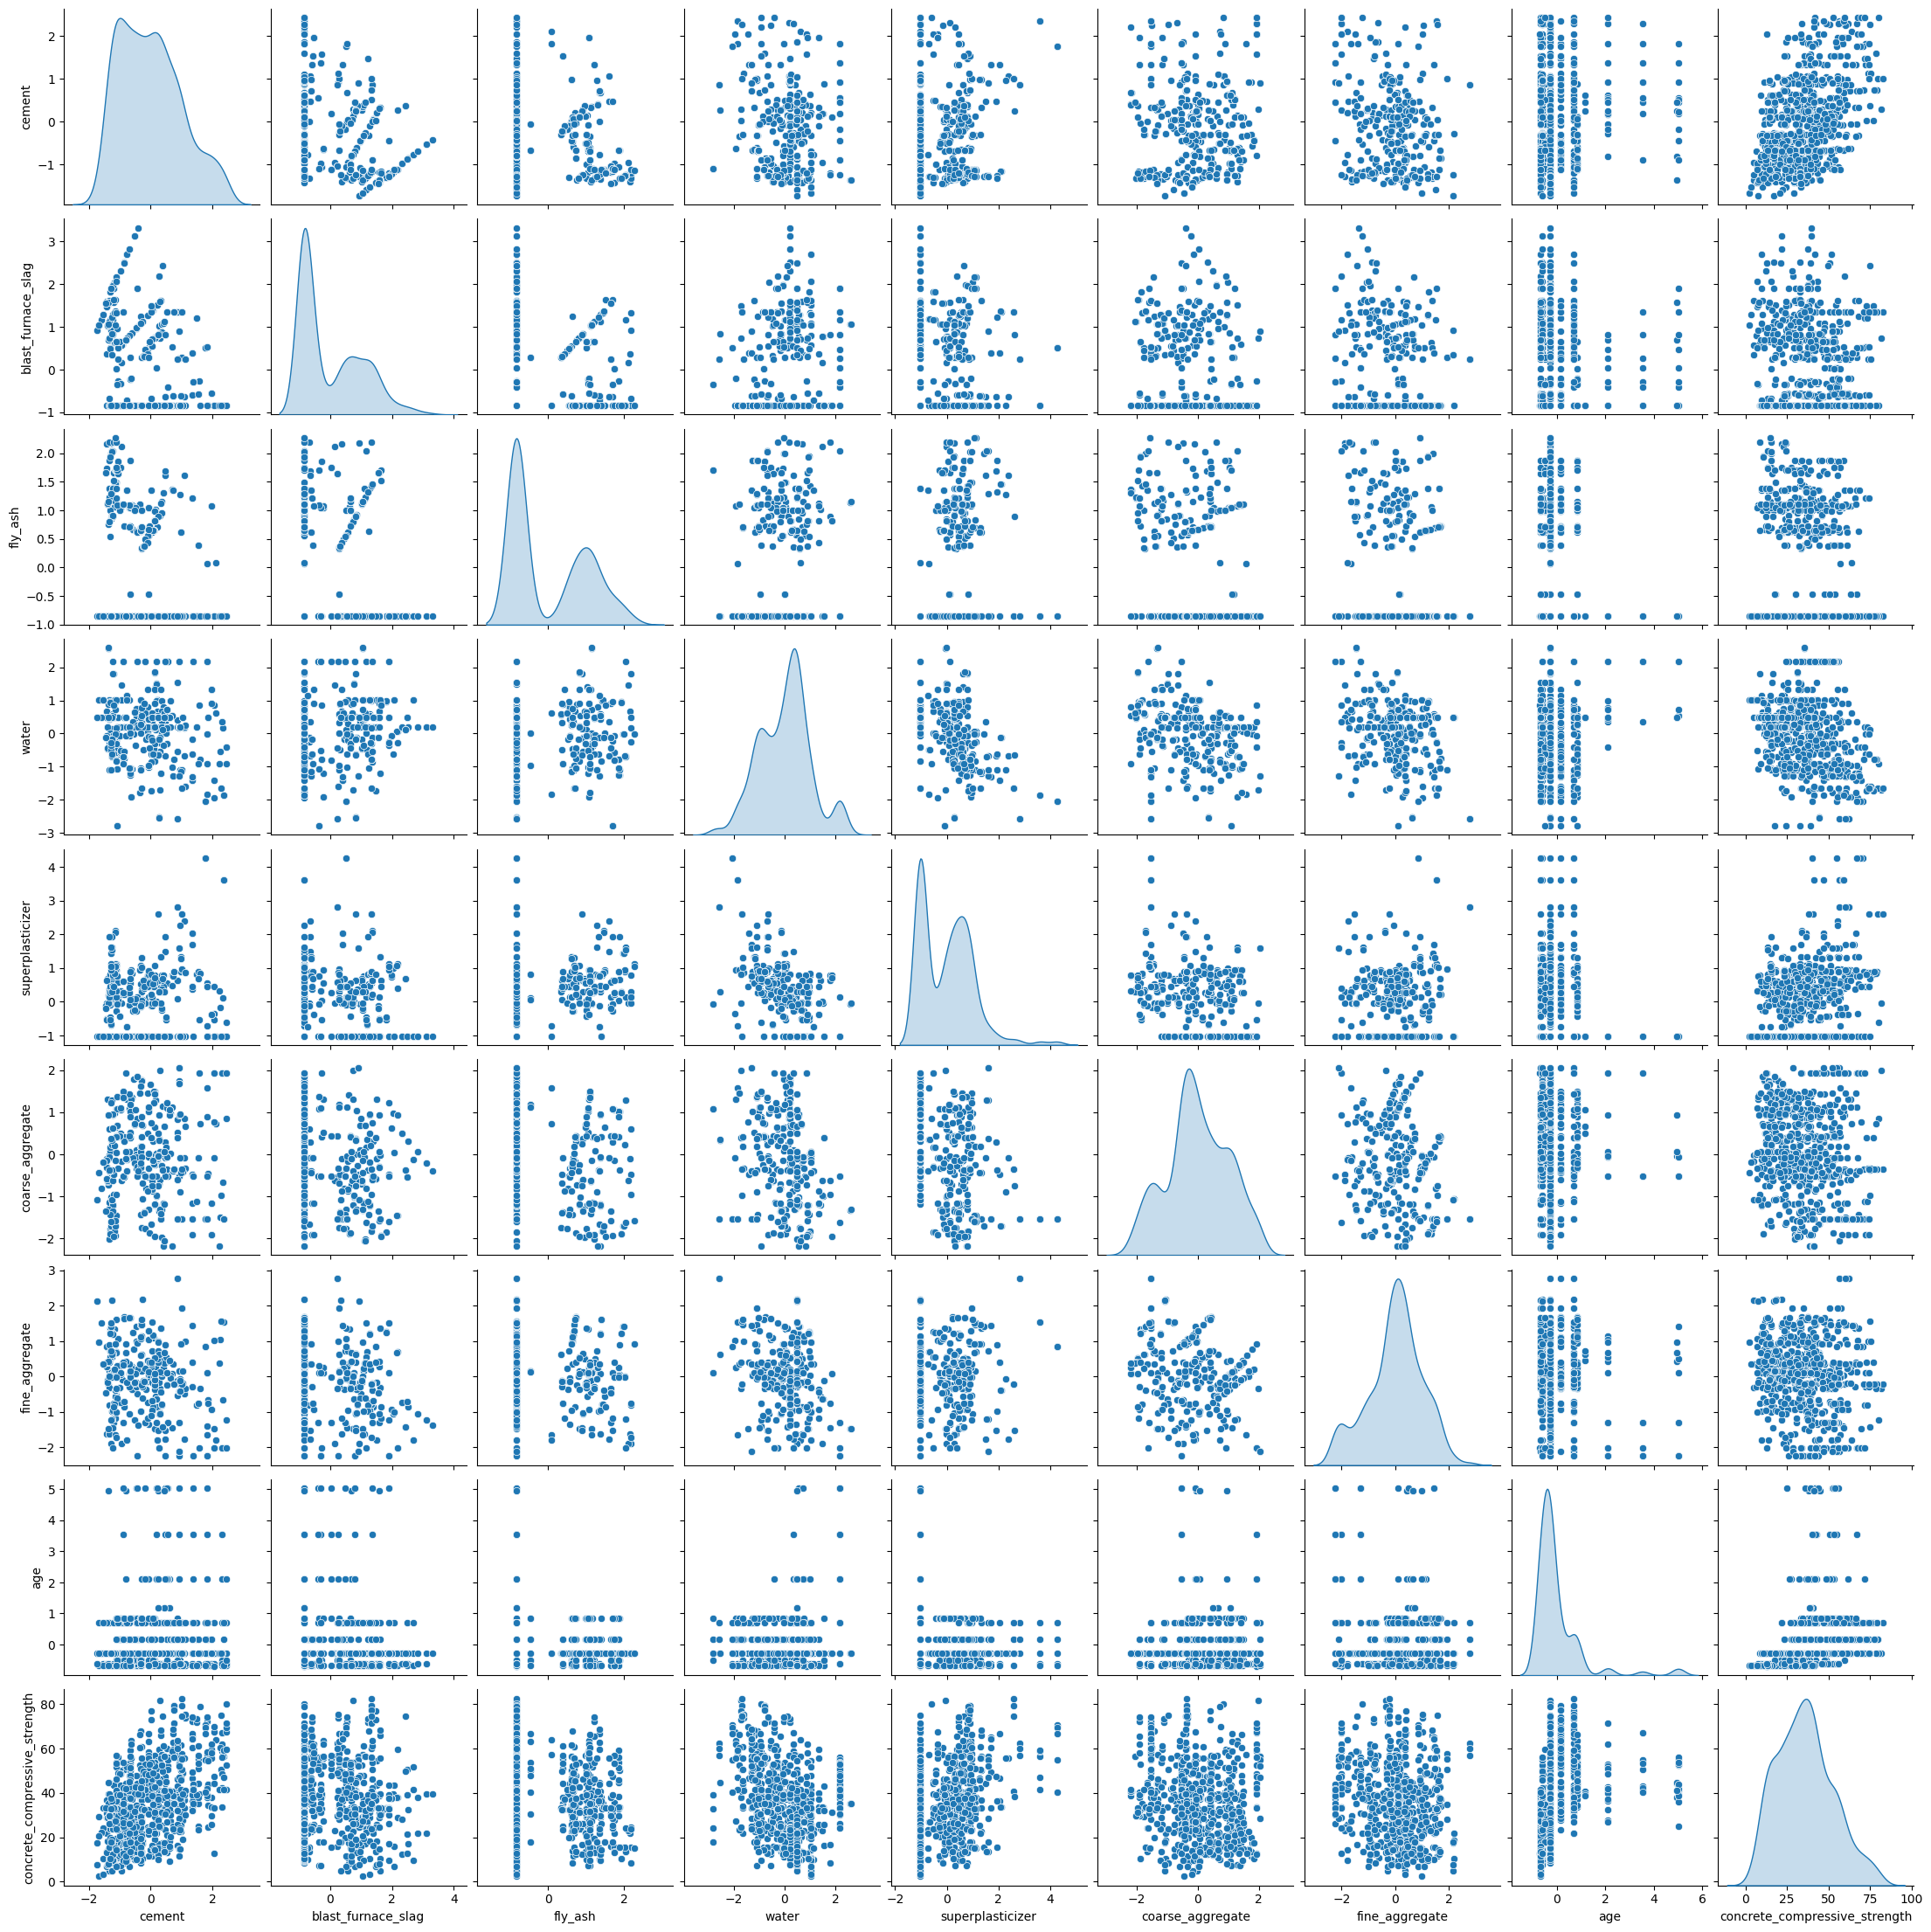

In [105]:
# plot pairplot for training data
sns.pairplot(data=data_train, diag_kind='kde')

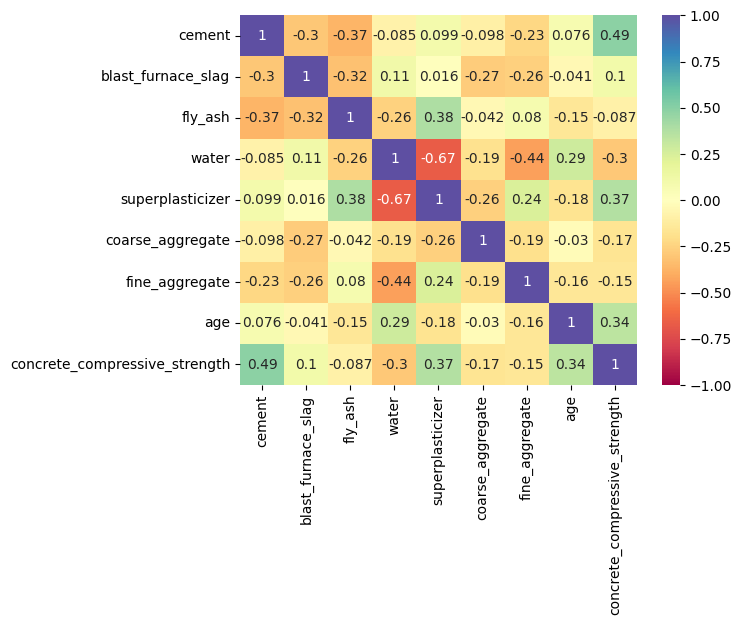

In [106]:
# calculate and plot correlation heatmap of training data
corr_train = data_train.corr()
sns.heatmap(corr_train, cmap='Spectral', annot=True, vmax=1, vmin=-1)
plt.show()

In [107]:
# variance inflation factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create an empty DataFrame to store VIF values for each feature
vif_data = pd.DataFrame()

# assign feature names to the 'feature' column of the DataFrame
vif_data['feature'] = X_train.columns

# calculate the VIF for each feature and store the results in the 'VIF' column
# the VIF measures multicollinearity by assessing how much the variance of the estimated regression coefficients is increased due to collinearity
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

# display the DataFrame with VIF values for each feature
vif_data

# the code calculates the Variance Inflation Factor (VIF) for each feature in the training data and stores the results in a DataFrame. It then displays the DataFrame containing the VIF values

feature       VIF
0              cement  7.459574
1  blast_furnace_slag  7.251302
2             fly_ash  6.069663
3               water  6.868921
4    superplasticizer  2.955631
5    coarse_aggregate  5.179078
6      fine_aggregate  6.750070
7                 age  1.132456

#### 2.2 Multipe Linear Regression

Let us now attempt to perform multiple linear regression from scratch. In Python, we can use vectorization to implement the multiple linear regression and the gradient descent.

In [108]:
import warnings

def fit_linear_regression (x, y, learning_rate, epsilon):
  """
  function: fits a linear regression using gradient descent and L2 loss

  parameters:
  x: np.array
    numpy array with the input values
  y: np.array
    numpy array with the target values
  learning_rate: float
    the learning rate for the gradient descent algorithm
  epsilon: float
    the error threshold. when the error is less than epsilon, the model has converged to the solution

  returns:
  b: float
    the bias of the regression
  w: np.array
    numpy array of the regression variable weights
  c: np.array
    numpy array of the cost of each epoch/iteration the model goes through. the length of this array is the total number of epochs taken by the model to converge
  """

  # step 1: insert a new column in the x array with ones for the y-intercept
  regression = np.c_[np.ones(len(x)), x]
  cost_list = []

  # step 2: declare the widths with the same width than x
  weights = np.ones(regression.shape[1])

  # step 3: implement gradient descent
  cost = 1
  epoch = 1
  while (cost > epsilon):
    # step 3.1: compute the partial
    y_pred = regression @ weights.T
    partial = regression.T @ (y - y_pred)

    # step 3.2: compute the cost
    cost = np.sum(np.sqrt(np.square(partial)))
    cost_list.append(cost)
    epoch += 1

    #step 3.3: adjust the weights
    weights = weights.T + (learning_rate * partial)
    if (np.isnan(cost)):
      warnings.warn('The model has diverged. Try again with a smaller learning rate.')

  # return the bias, weights and cost as we progress through the training epochs
  return weights[0], weights[1:].tolist(), cost_list


def predict (x, b, w):
  """
  function: predicts a target value using a multiple linear regression

  parameters:
  x: np.array
    numpy array with the input values
  b: float
    the bias of the regression
  w: np.array
    numpy array of the regression variable weights

  returns:
  y: np.array
    numpy array of the predicted values
  """
  return w @ np.array(x).T + b

In [109]:
# finding the bias, weights, and cost of the
b, w, c = fit_linear_regression(X_train, y_train, 0.0001, 0.9)

print("Linear Regression Model Results:")
print("Bias (Intercept):", b)
print("Weights (Coefficients):", w)

Linear Regression Model Results:
Bias (Intercept): 35.91849705802717
Weights (Coefficients): [11.979926285539692, 8.32283304543655, 5.165663746809612, -3.8311958876441867, 1.6659635791755185, 1.019294934275759, 1.262057559588546, 7.584427278252392]


In [110]:
# find the number of iterations
len(c)

2678

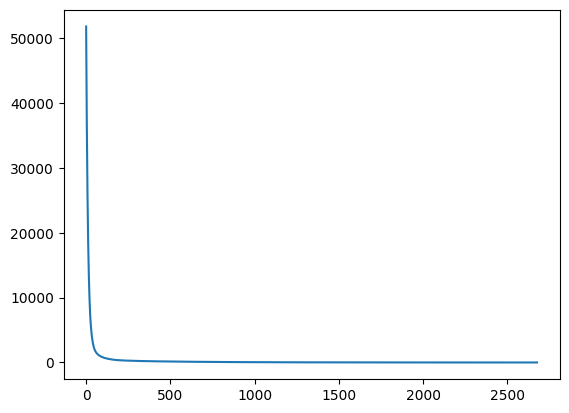

In [111]:
# plot the cost value as the model reaches convergence
plt.plot(c)

We can see that it has taken 2,678 epochs/iterations for the model to converge. In the graph, it can be seen that the cost was high at the beginning (greater than 50,000 in the first few epochs), but quickly decreased, and kept decreasing until the error was less than the epsilon value set.

Let us now use the model to predict the value of concrete strength based on the test data - data which the model has not seen before.

In [112]:
# make a prediction of the target value based on the model
y_pred = predict(X_test, b, w)

# verify that the y_pred and y_test arrays are of the same size
y_pred.shape, y_test.shape

((258,), (258,))

We will use Root Mean Square Error (RMSE) to evaluate our model's predicted y-values. RMSE is a metric commonly used in multiple linear regression (MLR) and other regression analyses. It serves several important purposes and is considered a good metric for evaluating the performance of regression models. Here's why RMSE is useful and why it's a good metric:


*   **Measures Prediction Accuracy:** RMSE quantifies how well the regression model's predictions align with the actual observed values, providing a measure of prediction accuracy. Lower RMSE values indicate better prediction accuracy, while higher values indicate larger prediction errors.
*   **Accounts for Prediction Errors:** RMSE takes into account the magnitude of prediction errors. It penalizes larger errors more heavily than smaller ones. This means that the model's performance is more sensitive to large errors, which are typically more important to minimize in practical applications.
*   **Interpretability:** RMSE is expressed in the same units as the target variable, which makes it easy to interpret.



In [113]:
def rms_error (y_predicted, y_actual):
  """
  function: calculated the RMSE of a regression

  parameters:
  y_predicted: np.array
    numpy array with the predicted target values
  y_actual: np.array
    numpy array with the actual target values (ground truth)

  returns:
  RMSE: float
    value of the RMSE in the same units as the target variable
  """
  mse = np.square(np.subtract(y_predicted, y_actual)).mean()
  return np.sqrt(mse)

In [114]:
# create a DataFrame to store the root mean squared error (RMSE) for model evaluation
test_rms_error = pd.DataFrame({'model': ['manual_mlr'], 'rmse': [rms_error(y_pred, y_test)]})

test_rms_error

model      rmse
0  manual_mlr  9.933852

#### 2.3 Multiple Linear Regression using Scikit Learn Library



In [115]:
from sklearn.linear_model import LinearRegression

# create a LinearRegression model and train it
reg = LinearRegression().fit(X_train, y_train)

# access the intercept and coefficients of the linear model
intercept = reg.intercept_  # The intercept of the linear model
coefficients = reg.coef_    # The coefficients (weights) associated with each feature

# calculate the r-squared (r2) score of the model on the training data
r_squared = reg.score(X_train, y_train)
# the t2 score measures the goodness-of-fit of the model to the training data
# it indicates the proportion of the variance in the target variable that is predictable from the features

# print the model parameters and evaluation metric
print("Intercept:", intercept)
print("Coefficients:", coefficients)
print("R-squared (R2) Score on Training Data:", r_squared)

Intercept: 35.918497058027214
Coefficients: [11.98674436  8.32952493  5.17147748 -3.82534147  1.66678836  1.02473446
  1.2685506   7.58473699]
R-squared (R2) Score on Training Data: 0.6087855359400989


In [116]:
y_pred_skl = reg.predict(X_test)

test_rms_error.loc[len(test_rms_error)] = {'model': 'skl_mlr', 'rmse': rms_error(y_pred_skl, y_test)}

test_rms_error

model      rmse
0  manual_mlr  9.933852
1     skl_mlr  9.933634

#### 2.4 Multiple Linear Regression using Stats Models Library



In [117]:
#just to check the regression statistics summary, eg. r-squared, F-test, residual distribution, etc...
import statsmodels.api as sm

# performing the regression and fitting the model
result = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# printing the summary table
print(result.summary())

                                  OLS Regression Results                                 
Dep. Variable:     concrete_compressive_strength   R-squared:                       0.609
Model:                                       OLS   Adj. R-squared:                  0.605
Method:                            Least Squares   F-statistic:                     148.4
Date:                           Wed, 27 Sep 2023   Prob (F-statistic):          6.84e-150
Time:                                   14:30:19   Log-Likelihood:                -2911.1
No. Observations:                            772   AIC:                             5840.
Df Residuals:                                763   BIC:                             5882.
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

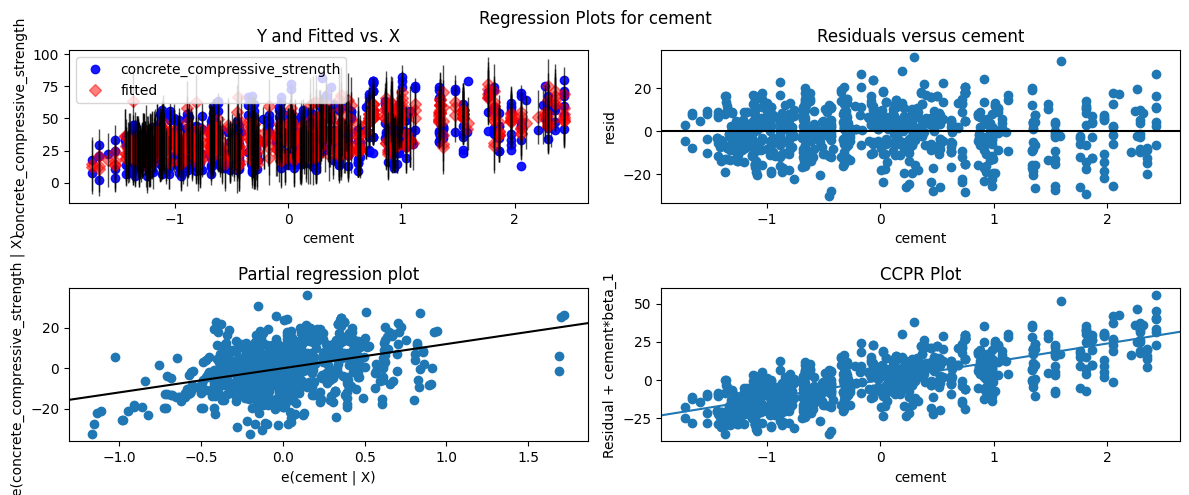

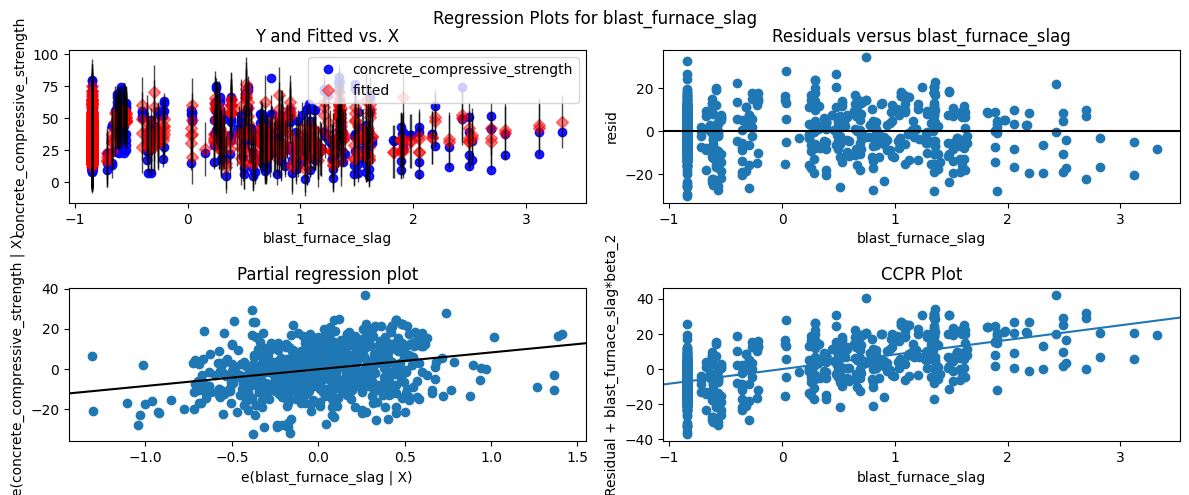

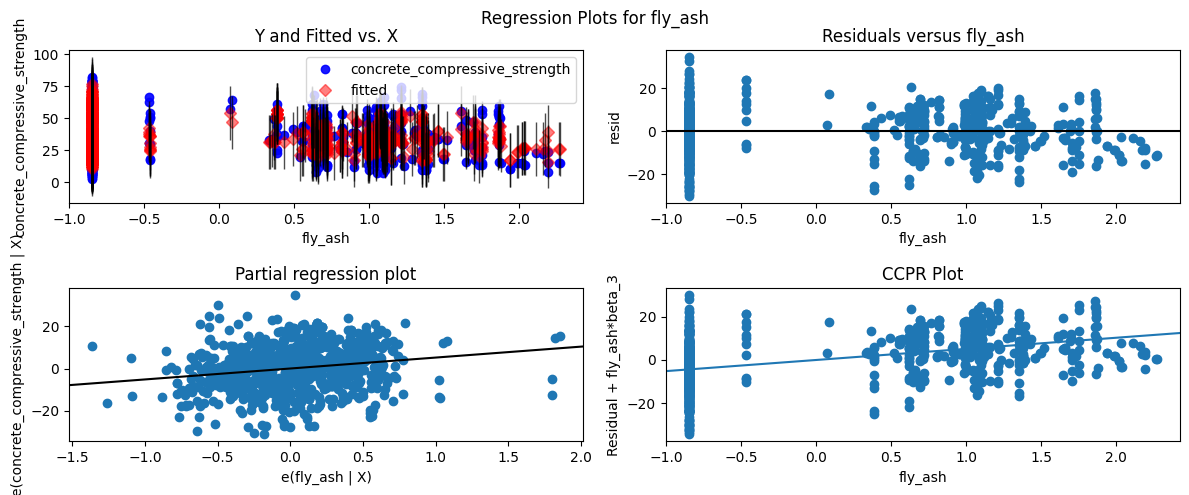

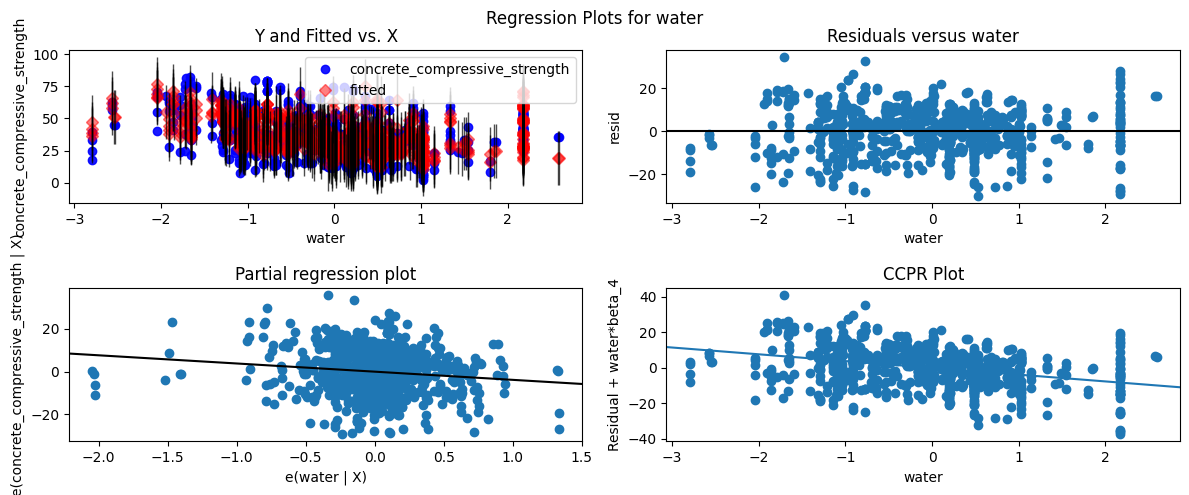

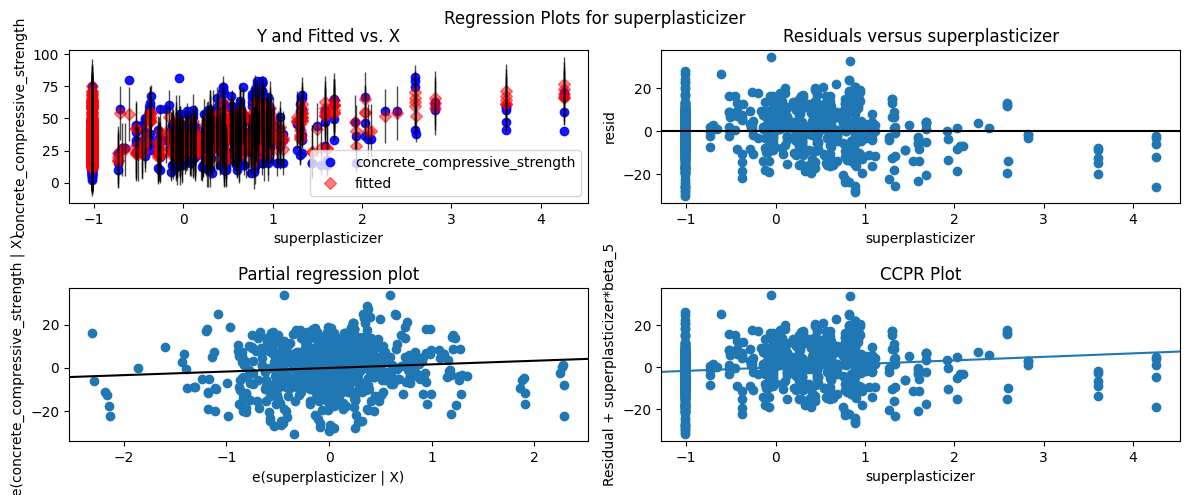

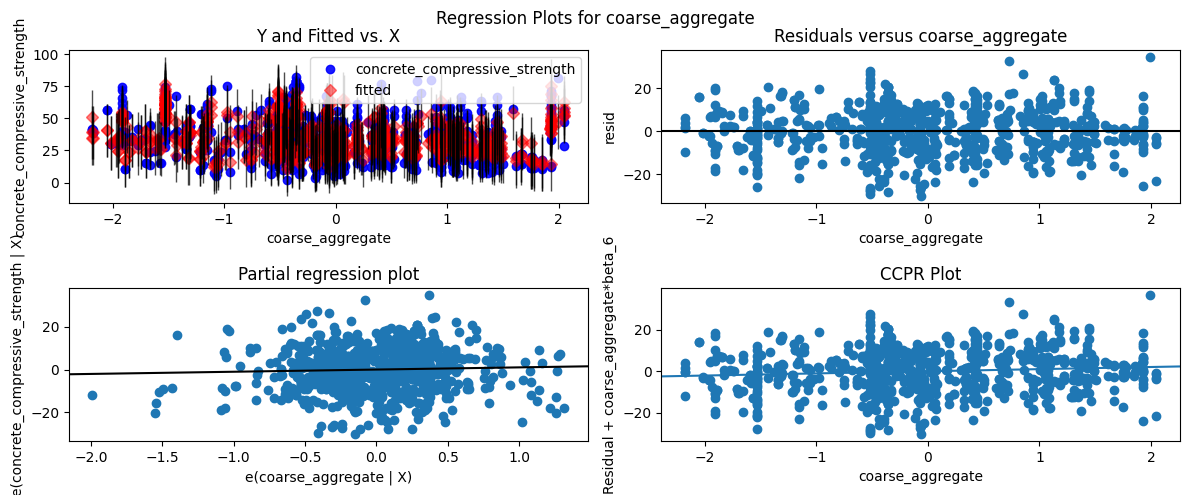

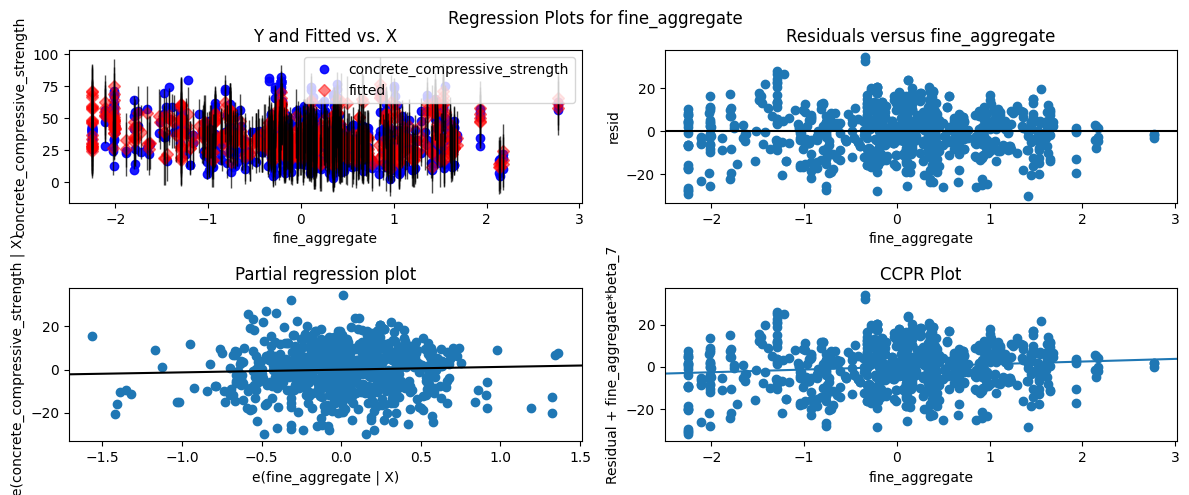

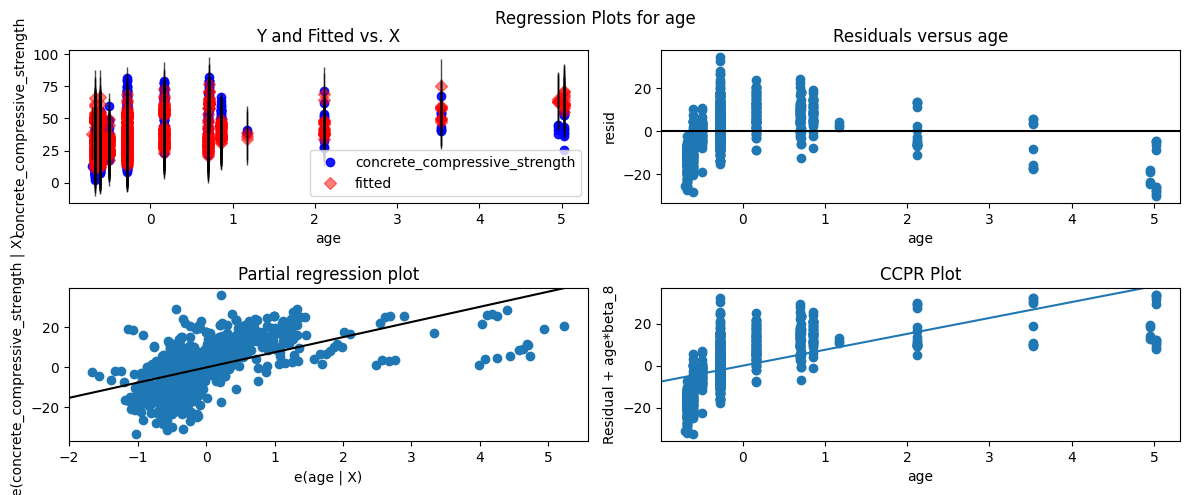

In [118]:
#define figure size
fig1 = plt.figure(figsize=(12,5))
fig2 = plt.figure(figsize=(12,5))
fig3 = plt.figure(figsize=(12,5))
fig4 = plt.figure(figsize=(12,5))
fig5 = plt.figure(figsize=(12,5))
fig6 = plt.figure(figsize=(12,5))
fig7 = plt.figure(figsize=(12,5))
fig8 = plt.figure(figsize=(12,5))
# fig9 = plt.figure(figsize=(12,5))

#produce regression plots
fig1 = sm.graphics.plot_regress_exog(result, 'cement',fig=fig1)
fig2 = sm.graphics.plot_regress_exog(result, 'blast_furnace_slag',fig=fig2)
fig3 = sm.graphics.plot_regress_exog(result, 'fly_ash',fig=fig3)
fig4 = sm.graphics.plot_regress_exog(result, 'water',fig=fig4)
fig5 = sm.graphics.plot_regress_exog(result, 'superplasticizer',fig=fig5)
fig6 = sm.graphics.plot_regress_exog(result, 'coarse_aggregate',fig=fig6)
fig7 = sm.graphics.plot_regress_exog(result, 'fine_aggregate',fig=fig7)
fig8 = sm.graphics.plot_regress_exog(result, 'age',fig=fig8)
# fig9 = sm.graphics.plot_regress_exog(result, 'concrete_compressive_strength',fig=fig9)

We can observe the detailed statistics of the multiple linear regression model using the statsmodels OLS (Ordinary Least Squares) method.

Before moving on to assess the goodness of fit and model performance, we must first check that regression assumptions are satisfied.

**Regression Assumptions**

1.   **Linearity Assumption:** The linearity assumption assumes that the relationship between the independent variables and the dependent variable is linear. From the scatterplots above, the independent variables appear to be linearly related to the dependent/target variable, although a few of them have very low correlation with the target variable.
2.   **Independence of Errors:** Linear regression assumes that the errors/residuals are independent. This assumption can be checked by examining the Durbin-Watson statistic, which in this regression has a value of 2.053. Since this value is close to 2, it suggests that there is little autocorrelation in the residuals. A DW statistic close to 0 would indicate positive autocorrelation, while a statistic close to 4 would insicate negative serial correlation.
3.   **Homoskedasticity Assumption:** The homoskedasticity assumption states that the variance of the errors is constant across all levels of the independent variables. We can do this by examining scatterplots of the residuals against each independent variable, as shown in the plots above. Most of the plots seem to not show presence of heteroskedasticity, expect the plot for residuals vs `age` in which we can see that the residuals may be correlated with the the independent variable `age`. Further investigation to test for heteroskedasticity, which may be done using the Breusch–Pagan test.
4.   **Normality of Errors:** Linear regression assumes that the errors are normally distributed. This assumption can be checked using diagnostic tests such as the Omnibus test and the Jarque-Bera test. These tests assess whether the residuals follow a normal distribution. In the regression above, both the Omnibus test and the Jarque-Bera test have p-values above 0.05, suggesting that the residuals do not significantly depart from a normal distribution.
5.   **Multicollinearity:** Multicollinearity occurs when independent variables in the model are highly correlated with each other. We can assess multicollinearity by examining the correlation matrix of the independent variables and by calculating variance inflation factors (VIFs) for each independent variable, which we have already done above. Most independent variables do not seem to be correlated with each other except for a few pairs, namely `superplasticizer` and `water`, `superplasticizer` and `fly_ash`, and `fine_aggregate` and `water`. Looking at the VIF scores above, quite a number of independent vsriables have scores in between 5 and 10, suggesting that multicollinearity may be present in the model. VIFs greater than 10 indicate serious multicollinearity issues, which this regression does not have.

As most of the regression assumptions are not seriously violated, we can proceed to the goodness of fit analysis.


**Goodness of Fit**


1.   **R-squared (R²):** The R-squared value is 0.609, indicating that approximately 60.9% of the variance in the concrete compressive strength is explained by the eight independent variables in your model. This suggests that the model has some explanatory power.
2.   **Adjusted R-squared:** The adjusted R-squared is 0.605, which is similar to R-squared but accounts for the model's complexity. It indicates a reasonable fit of the model.
3.   **F-statistic:** The F-statistic is 148.4, and its associated p-value (Prob (F-statistic)) is very close to zero (6.84e-150). This suggests that at least one of the independent variables in the model is statistically significant in explaining the variance in the dependent variable. In other words, the overall model is statistically significant.
4.   **Coefficients:** The coefficients represent the estimated values of the regression equation. Each coefficient corresponds to an independent variable.
*   The constant (const) has a coefficient of approximately 35.9185, representing the estimated intercept of the regression line.
*   The coefficients for the independent variables indicate how each of these variables contributes to the predicted value of concrete compressive strength.
*   5 out of the 8 coefficients have associated p-values close to zero, indicating that they are statistically significant in the model.
*   3 of the coefficients have p-values greater than 0.05 - these correspond to the `superplasticizer`, `coarse_aggregate` and `fine_aggregate` variables. This means that at the 5% significance level, we cannot reject the null hypothesis that these coefficients are significantly different from 0, and hence they may not be statistically significant.

5.   **Omnibus test and Jarque-Bera test and Skewness & Kurtosis statistics:** These are measures of the model's goodness of fit and distributional assumptions. In this regression, the results suggest that the residuals have a fairly normal distribution, as indicated by fairly high p-values for the Omnibus and Jarque-Bera tests. The skewness of -0.132 is close to 0, and the kurtosis of 3.026 is close to 3 (excess kurtosis of 0.026 close to 0), both of which indicate a fairly normal distribution of the residuals.
6.   **Cond. No.:** The condition number (Cond. No.) is 8.68. A high condition number may indicate multicollinearity among the independent variables. Further investigation may be needed to assess the impact of multicollinearity on the model.



In summary, the OLS regression model appears to have some explanatory power, is statistically significant, and has coefficients that indicate the direction and strength of the relationships between the independent variables and concrete compressive strength.

We can now proceed to compare the 3 MLR models.

In [119]:
y_pred_sm = result.predict(sm.add_constant(X_test))

test_rms_error.loc[len(test_rms_error)] = {'model': 'statsModels_mlr', 'rmse': rms_error(y_pred_sm, y_test)}

test_rms_error

model      rmse
0       manual_mlr  9.933852
1          skl_mlr  9.933634
2  statsModels_mlr  9.933634

As we can see in the table above, the RMS error values above for the 3 MLR models are very close to each other, with the manual MLR method having a very slightly higher RMSE. The values of the bias and weights (constant and coefficient values) are also almost identical. Hence, we can conclude that the MLR models are all in aggreement with each other.

# Answer 3

We will now apply kernel ridge regression with 3 kernels:
1.   linear kernel
2.   polynomial kernel with degree 3
3.   rbf kernel


For the RBF (Radial Basis Function) kernel, it is necessary to preprocess the inputs by scaling or normalizing them. This preprocessing step is important for several reasons:

1.   **Sensitivity to Scale:** The RBF kernel is sensitive to the scale of the input features. Features with larger scales can dominate the kernel computation, leading to suboptimal results. Scaling ensures that all features have equal importance in the kernel calculation.

2.   **Euclidean Distance:** The RBF kernel relies on the Euclidean distance between data points. If the features are on different scales, the distance metric will be skewed, and the kernel might not capture the true relationships between data points.

3.   **Regularization:** In some cases, the RBF kernel might also be used with a regularization parameter (gamma). Scaling the input features appropriately can help in setting the gamma value effectively.

Since we have already standardized the training data (and subsequently standardized the test data using the same standardizer), we can proceed to use the data for training the RBF model.*italicized text*

In [120]:
from sklearn.kernel_ridge import KernelRidge

In [121]:
# create Kernel Ridge Regression models with different kernels
# the 'kernel' parameter specifies the type of kernel to use: 'linear', 'polynomial', or 'rbf'
linear_kernel_model = KernelRidge(kernel='linear')
polynomial_kernel_model = KernelRidge(kernel='polynomial')
rbf_kernel_model = KernelRidge(kernel='rbf')

# train the models on the training data
linear_kernel_model.fit(X_train, y_train)
polynomial_kernel_model.fit(X_train, y_train)
rbf_kernel_model.fit(X_train, y_train)

# make predictions on the test data using the trained models
y_pred_linear = linear_kernel_model.predict(X_test)
y_pred_polynomial = polynomial_kernel_model.predict(X_test)
y_pred_rbf = rbf_kernel_model.predict(X_test)

# calculate RMSE
rms_error_linear = rms_error(y_pred_linear, y_test)
rms_error_polynomial = rms_error(y_pred_polynomial, y_test)
rms_error_rbf = rms_error(y_pred_rbf, y_test)

# add the results to the DataFrame
test_rms_error.loc[len(test_rms_error)] = {'model': 'kernel_linear_default', 'rmse': rms_error_linear}
test_rms_error.loc[len(test_rms_error)] = {'model': 'kernel_polynomial_default', 'rmse': rms_error_polynomial}
test_rms_error.loc[len(test_rms_error)] = {'model': 'kernel_rbf_default', 'rmse': rms_error_rbf}

test_rms_error

model       rmse
0                 manual_mlr   9.933852
1                    skl_mlr   9.933634
2            statsModels_mlr   9.933634
3      kernel_linear_default  37.551902
4  kernel_polynomial_default   6.822910
5         kernel_rbf_default   7.208866

From the results above, we can see that by using the default values of the kernel ridge regression, the RMSE is higher for the linear kernel model at 37.55 compared to the OLS regression in part (2). However, the other 2 kernel methods, polynomial and rbf, have lower RMSE values at 6.82 and 7.21, respectively. However, we can do better by performing cross-validation and hyperparameter tuning, which allows us to potentially lower the RMSE.

To perform cross-validation and hyperparameter tuning for the three kernels in your Kernel Ridge Regression model, we can use the `GridSearchCV` class from the scikit-learn library.

In this code, we use `GridSearchCV` to search for the best hyperparameters (`alpha`, `degree`, and `gamma`) for each kernel using cross-validation (`cv=5` specifies 5-fold cross-validation). After the grid search, we obtain the best models with the optimized hyperparameters and use them to make predictions and calculate the root mean squared error (RMS error) on the test dataset. Finally, we add the results to the test_rms_error DataFrame.

We cycle through a range of hyperparameters and choose the most optimal value. For all 3 models, we have the `alpha` hyperparameter values of 0.1, 1, and 10. For the polynomial model, we have values of the polynomial `degree` hyperparameter of 2, 3, and 4. For the rbf model, we have values of `gamma` hyperparameter of 0.1, 1, and 10.

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

# define the parameter grids for each kernel
param_grid_linear = {'alpha': [0.1, 1, 10]}
param_grid_polynomial = {'alpha': [0.1, 1, 10], 'degree': [2, 3, 4]}
param_grid_rbf = {'alpha': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

# create the models
linear_kernel_model = KernelRidge(kernel='linear')
polynomial_kernel_model = KernelRidge(kernel='polynomial')
rbf_kernel_model = KernelRidge(kernel='rbf')

# create GridSearchCV objects for each kernel
grid_search_linear = GridSearchCV(linear_kernel_model, param_grid_linear, cv=5, scoring='neg_mean_squared_error')
grid_search_polynomial = GridSearchCV(polynomial_kernel_model, param_grid_polynomial, cv=5, scoring='neg_mean_squared_error')
grid_search_rbf = GridSearchCV(rbf_kernel_model, param_grid_rbf, cv=5, scoring='neg_mean_squared_error')

# fit the models with cross-validation
grid_search_linear.fit(X_train, y_train)
grid_search_polynomial.fit(X_train, y_train)
grid_search_rbf.fit(X_train, y_train)

# get the best models
best_linear_kernel_model = grid_search_linear.best_estimator_
best_polynomial_kernel_model = grid_search_polynomial.best_estimator_
best_rbf_kernel_model = grid_search_rbf.best_estimator_

# use the best models to make predictions
y_pred_linear = best_linear_kernel_model.predict(X_test)
y_pred_polynomial = best_polynomial_kernel_model.predict(X_test)
y_pred_rbf = best_rbf_kernel_model.predict(X_test)

# calculate RMSE
rms_error_linear = rms_error(y_pred_linear, y_test)
rms_error_polynomial = rms_error(y_pred_polynomial, y_test)
rms_error_rbf = rms_error(y_pred_rbf, y_test)

# add the results to the DataFrame
test_rms_error.loc[len(test_rms_error)] = {'model': 'kernel_linear_optimised', 'rmse': rms_error_linear}
test_rms_error.loc[len(test_rms_error)] = {'model': 'kernel_polynomial_optimised', 'rmse': rms_error_polynomial}
test_rms_error.loc[len(test_rms_error)] = {'model': 'kernel_rbf_optimised', 'rmse': rms_error_rbf}

test_rms_error

model       rmse
0                   manual_mlr   9.933852
1                      skl_mlr   9.933634
2              statsModels_mlr   9.933634
3        kernel_linear_default  37.551902
4    kernel_polynomial_default   6.822910
5           kernel_rbf_default   7.208866
6      kernel_linear_optimised  37.553706
7  kernel_polynomial_optimised   6.162020
8         kernel_rbf_optimised   6.298204

To quantify the performance improvement with respect to the linear case and compare it to the other kernels, we have calculated the relative improvement in RMSE for each model compared to the linear model.

**Observations:**
1.   Both the Polynomial Kernel and RBF Kernel outperform the OLS model, with lower RMSE values. This indicates that these kernel methods capture more complex relationships in the data.
2.   The Linear Kernel performs worse than the OLD model, with RMSE substantially higher for both the default and optimised cases.
3.   The greatest improvement in RMSE is observed with the Polynomial Optimised Kernel compared to the OLS model.


Overall, the choice of the kernel depends on the specific characteristics of your data and the trade-off between model complexity and predictive performance. If computational efficiency is not a concern, and our aim is for better predictive performance, the Polynomial Optimised Kernel would be the preferred choice.